In [22]:
import numpy as np
import pandas as pd

Dataset: https://docs.google.com/spreadsheets/d/165ljaI7eJx6UPF657PqePsQybfgFs2h4/edit?usp=drive_link&ouid=117794239620067054421&rtpof=true&sd=true

##Reading Excel

In [23]:
prdu = pd.read_excel('/content/drive/MyDrive/for jobs/GG Colab/Read data/products.xlsx') #có nhiều sheet, khi không gọi tên nhất định sẽ lấy sheet đầu tiên
prdu.head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [24]:
prdu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   1245 non-null   object 
 1   price        1245 non-null   float64
 2   merchant_id  1245 non-null   int64  
 3   brand        1245 non-null   object 
 4   name         1245 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 48.8+ KB


In [25]:
prdu.describe()

,price,merchant_id
count,1245.000000,1245.000000
mean,438.329422,1039.637751
std,1049.996010,67.757272
min,8.330000,1001.000000
25%,77.640000,1001.000000
50%,169.990000,1005.000000
75%,399.990000,1043.000000
max,19997.990000,1240.000000


In [26]:
prdu.shape

(1245, 5)

In [27]:
prdu.isnull().sum()

,0
product_id,0
price,0
merchant_id,0
brand,0
name,0


In [28]:
prdu.dtypes

,0
product_id,object
price,float64
merchant_id,int64
brand,object
name,object


In [35]:
prdu.duplicated().sum()

np.int64(0)

##Excel có nhiều sheet nên sẽ có thể chọn 1 trong các sheet để phân tích, tương tự giống table trong sql

In [29]:
sheet_names = pd.ExcelFile('/content/drive/MyDrive/for jobs/GG Colab/Read data/products.xlsx').sheet_names
print(sheet_names)

['Products', 'Descriptions', 'Merchants']


In [30]:
dfprdu = pd.read_excel('/content/drive/MyDrive/for jobs/GG Colab/Read data/products.xlsx', sheet_name = 'Products')
dfprdu.head()

,product_id,price,merchant_id,brand,name
0,AVphzgbJLJeJML43fA0o,104.99,1001,Sanus,Sanus VLF410B1 10-Inch Super Slim Full-Motion ...
1,AVpgMuGwLJeJML43KY_c,69.00,1002,Boytone,Boytone - 2500W 2.1-Ch. Home Theater System - ...
2,AVpe9FXeLJeJML43zHrq,23.99,1001,DENAQ,DENAQ - AC Adapter for TOSHIBA SATELLITE
3,AVpfVJXu1cnluZ0-iwTT,290.99,1001,DreamWave,DreamWave - Tremor Portable Bluetooth Speaker ...
4,AVphUeKeilAPnD_x3-Be,244.01,1004,Yamaha,NS-SP1800BL 5.1-Channel Home Theater System (B...


In [31]:
dfdesc = pd.read_excel('/content/drive/MyDrive/for jobs/GG Colab/Read data/products.xlsx', sheet_name = 'Descriptions')
dfdesc.head()

,product_id,description
0,AVphzgbJLJeJML43fA0o,"Audio & Video Accessories,TV Mounts,TV Accesso..."
1,AVpgMuGwLJeJML43KY_c,"Stereos,Portable Bluetooth Speakers,TV, Video ..."
2,AVpe9FXeLJeJML43zHrq,"Computers,Office,Computer Accessories,Computer..."
3,AVpfVJXu1cnluZ0-iwTT,"Portable Bluetooth Speakers,Bluetooth & Wirele..."
4,AVphUeKeilAPnD_x3-Be,"Surround Speakers,Electronics Features,Surroun..."


In [32]:
dfmech = pd.read_excel('/content/drive/MyDrive/for jobs/GG Colab/Read data/products.xlsx', sheet_name = 'Merchants')
dfmech.head()

,merchant_id,merchant
0,1001,Bestbuy.com
1,1002,Walmart.com
2,1003,Bestbuy.com
3,1004,Growkart
4,1005,bhphotovideo.com


## Định vị dữ liệu với startrow và startcol

dfprdu.to_excel('out.xlsx',
                  sheet_name='Products',
                  startrow=1,
                  startcol=2) => khi hiển thị trong Excel sẽ bắt đầu từ hàng thứ 1 và cột thứ 2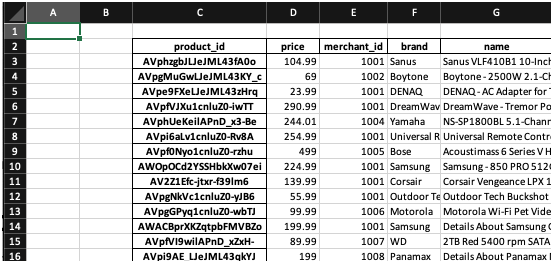

##Lưu nhiều sheet

*   with pd.ExcelWriter('out.xlsx') as writer:
    products.to_excel(writer, sheet_name='Products')
    merchants.to_excel(writer, sheet_name='Merchants')

